> # BT3102 HW3
> This homework contains several coding tasks and Q&A questions. 
>
>>For coding part, please write codes in corresponding cells starts from **YOUR CODES HERE**. 
>>
>>For Q&A, you will see cells with **Answer: HERE**. Please double click those cells and directly write your answer.
>>
>>For other cells, please directly run the cell.
>>
>>**Please make sure you have expanded all hidden cells!** You can refer to https://stackoverflow.com/questions/62457417/unhide-all-cells-in-google-colab for more information.
>
>
> You should use Python 3 to do this homework. Python 2 may not be supported. (You can also submit code in MATLAB alternatively.)
>
>
> ## Due Date: Nov. 9 (Thu), 22:00 SG Time
> ## Deliverables
> Save your notebook `ipynb` file as `StudentID_YourName_HW3.ipynb`, generate an `html` file from `ipynb` file and save as `StudentID_YourName_HW3.html`. Zip your notebook file and html file into a single `zip` file. 
>
> **Upload the `zip` file as `StudentID_YourName_HW3.zip`. Please do NOT include the data file (i.e., graph.pkl) in your submission.**
>
> **Please make sure your code is executable.**
>
>>How to generate an HTML file from your notebook file in Google Colab?  
>>Please refer to https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab
>
> ## HW3 worths 8 points in the final assessment.

**STU1**

StuID: A0239429U

Name: Tay Xinyu, Zandra


**STU2**

StuID: A0123456X

Name: DEF

*In compliance with the* [*general message*](https://libguides.nus.edu.sg/new2nus/acadintegrity#s-lib-ctab-22144949-4) *and* [*guidelines*](https://libguides.nus.edu.sg/new2nus/acadintegrity#s-lib-ctab-22144949-5) *on the use of AI tools for academic work from the University, if you use any AI tools for this homework, please fill in the table below. Thank you.*


| AI Tool used    |   Prompt and output   |   How the output was used in the assignment   |
| ---- | ---- | ---- |
|   --   |   --   |   --   |
|   --   |   --   |   --   |

# Problem 1. PageRank

## Input
Load the graph and understand the data.

In [8]:
import nbconvert

In [2]:
# Import libraries
import numpy as np
from scipy import sparse
import pandas as pd
import pickle

beta = 0.86 # used in computing the PageRank

# You may use the line below to load the data
with open('graph.pkl', 'rb') as f:
    M = pickle.load(f)

M is a square matrix contains only 0 and 1. $M_{ij}=1$ if and only if webpage j links to webpage i. The number of rows (or columns) of the matrix is the number of webpages in the network. You may want to store that number in a variable

### <u> Print the number of rows and colums of data. </u> (0.5')


In [4]:
# YOUR CODES HERE
rows, cols = M.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')

Number of rows: 5500
Number of columns: 5500


### <u> Short answer questions. (Please print the results.) </u> (1')

(1) How many links in total does M has? (print the number of links)

In [5]:
# Answer HERE
num_links = np.sum(M == 1)
print(f'Number of links: {num_links}')

Number of links: 82155


(2) How sparse is M? (print a ratio within 0-1)

In [6]:
# Answer HERE
sparsity = np.sum(M == 0) / M.size
print(f'Sparsity: {sparsity}')

Sparsity: 0.997284132231405


## Question 1

Each column of matrix M corresponds to one webpage in the network. For each column, divide each entry by the total number of outbound links of that webpage. Store the resulting matrix in "M2". Note that the graph may contain dead-end node. We will deal with this issue later.


In [7]:
# Check if there are any NaN in your matrix after the operation
# You can use np.isnan(your_matrix).any() to check. If there are NaNs, then you need to figure out why and fix it

# YOUR CODES HERE
col_sums = np.sum(M, axis=0)

# Divide each column entry by the respective column sum
M2 = M / col_sums

print(M2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


C:\Users\zandr\AppData\Local\Temp\ipykernel_19116\3547269860.py:8: RuntimeWarning: invalid value encountered in divide
  M2 = M / col_sums


In [6]:
if (np.isnan(M2).any() == False):
    print("There are no NaNs in M2")
else:
    print("There are NaNs present in M2")

There are NaNs present in M2


In [8]:
# FIXING PRESENCE OF NANS

# Anwser here ... 
col_sums = np.sum(M, axis=0)

# Avoid division by zero by replacing 0 with 1 (since anything divided by 1 remains unchanged)
col_sums[col_sums == 0] = 1

# Divide each column entry by the respective column sum
M2 = M / col_sums

print(M2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Pre-process the matrix M2 to handle the "dead-end nodes". Store the new matrix as "H"

In [9]:
# YOUR CODES HERE
# initialise new matrix H with zeros, same shape as M2
H = np.zeros_like(M2)

for i in range(M2.shape[1]):
    column = M2[:, i]
    if np.sum(column) == 0:
        # assign handled node back to H
        N = len(column)
        H[:, i] = 1/N  # This assigns 1/N to all elements in the i-th column
    else:
        H[:, i] = column

#### <u> Please print the 1st entry of the 125 column of your matrix H. </u> (0.5')

In [9]:
# YOUR CODES HERE
H[:, 124][0]

0.0001818181818181818

#### Raise matrix G to the 10th power and then multiply it by the initial PageRank vector. (0.5')  <u>Print the resulting PageRank vector and the runtime.</u>  (Hint: use the command %%time in the cell).

(You can use `np.linalg.matrix_power(G, n)`[1] to raise a matrix `G` to `n`th power). Check the run time of this computation.

This is supposed to run for some time so that in the subsequent questions, you will see the improvement due to other methods we mentioned in the lecture. <u> You are required to record the runtime of all questions at the end of this problem. </u>

Hint: after you get the PageRank vector, you can take the sum of all elements in the vector to check if it is 1.


[1] https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_power.html

In [11]:
beta_H = beta * H

# create a matrix that has the same size as G, such that all entries are 1/num_rows
row, col = H.shape
valueToFill = 1/col
temp_matrix = np.full((row, col), valueToFill)

# Compute G
G = beta_H + (1-beta)*temp_matrix
G

array([[2.54545455e-05, 2.54545455e-05, 2.54545455e-05, ...,
        2.54545455e-05, 2.54545455e-05, 2.54545455e-05],
       [2.54545455e-05, 2.54545455e-05, 2.54545455e-05, ...,
        2.54545455e-05, 2.54545455e-05, 2.54545455e-05],
       [2.54545455e-05, 2.54545455e-05, 2.54545455e-05, ...,
        2.54545455e-05, 2.54545455e-05, 2.54545455e-05],
       ...,
       [2.54545455e-05, 2.54545455e-05, 2.54545455e-05, ...,
        2.54545455e-05, 2.54545455e-05, 2.54545455e-05],
       [2.54545455e-05, 2.54545455e-05, 2.54545455e-05, ...,
        2.54545455e-05, 2.54545455e-05, 2.54545455e-05],
       [2.54545455e-05, 2.54545455e-05, 2.54545455e-05, ...,
        2.54545455e-05, 2.54545455e-05, 2.54545455e-05]])

In [12]:
%%time
# YOUR CODES HERE

# Initialise the PageRank vector to be 1/N for all entries, where N is the total number of webpages in the graph
pr_vector = np.ones(row)/row

raised_multiplied_G = np.linalg.matrix_power(G, 10) @ pr_vector
raised_multiplied_G

CPU times: total: 3min 38s
Wall time: 30.3 s


array([0.00012812, 0.00010817, 0.00012206, ..., 0.00018549, 0.00010179,
       0.00015261])

## Question 2
Use `sparse.csr_matrix()`[1] to transform your matrix H to a sparse matrix. Store the new matrix as "HS".

[1] https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

In [10]:
# YOUR CODES HERE
HS = sparse.csr_matrix(H)

#### Compute the probability that you will be landing on each page in the network after 10 steps using the sparse matrix HS only. Initialize the PageRank vector to be 1/N for all entries, where N is the total number of webpage in the graph. <u>Print the PageRank vector after 10 steps and the runtime.</u> (0.5')


In [12]:
pr_vector = np.ones(row)/row

new_pr_vector = pr_vector.copy()

In [18]:
%%time
# YOUR CODES HERE

result = np.full((row, 1), 1/row)
e = np.full((row, 1), 1/row)

for i in range(10):
    result = beta * (HS * result) + (1-beta)*e
    
print(result)

[[0.00012812]
 [0.00010817]
 [0.00012206]
 ...
 [0.00018549]
 [0.00010179]
 [0.00015261]]
CPU times: total: 0 ns
Wall time: 87.5 ms


#### Redo this question but use the matrix H instead of HS, <u> print the PageRank vector after 10 steps and the runtime.</u> (0.5'). Both of these two methods should be much faster than raising the matrix to the 10th power. You should be able to notice the runtime difference.


In [22]:
%%time
# YOUR CODES HERE

result = np.full((row, 1), 1/row)
e = np.full((row, 1), 1/row)

for i in range(10):
    result = beta * (H * result) + (1-beta)*e
    
print(result)

[[2.54545455e-05 2.54545455e-05 2.54545455e-05 ... 2.54545455e-05
  2.54545455e-05 2.54545455e-05]
 [2.54545455e-05 2.54545455e-05 2.54545455e-05 ... 2.54545455e-05
  2.54545455e-05 2.54545455e-05]
 [2.54545455e-05 2.54545455e-05 2.54545455e-05 ... 2.54545455e-05
  2.54545455e-05 2.54545455e-05]
 ...
 [2.54545455e-05 2.54545455e-05 2.54545455e-05 ... 2.54545455e-05
  2.54545455e-05 2.54545455e-05]
 [2.54545455e-05 2.54545455e-05 2.54545455e-05 ... 2.54545455e-05
  2.54545455e-05 2.54545455e-05]
 [2.54545455e-05 2.54545455e-05 2.54545455e-05 ... 2.54545455e-05
  2.54545455e-05 2.54545455e-05]]
CPU times: total: 3.14 s
Wall time: 6 s


Numpy is a very efficient implementation of matrix operations, you should be able to see substantial improvement in computation time compared with Q1.


## Question 3
**Implement the algorithm in slide 14 -- 17 of Week 8 Tutorial for 10 steps.** Please use the sparse matrix `HS` instead of `H`, run the algorithm for 10 steps. (0.5')

#### Initialize the PageRank vector to be 1/N for all entries, where N is the total number of webpage in the graph. <u> Print the PageRank vector after 10 steps and the runtime. </u>

In [14]:
%%time

result = np.full((row, 1), 1/row)
e = np.full((row, 1), 1/row)

for i in range(10):
    result = beta * (HS * result) + (1-beta)*e
    
print(result)

[[0.00012812]
 [0.00010817]
 [0.00012206]
 ...
 [0.00018549]
 [0.00010179]
 [0.00015261]]
CPU times: total: 46.9 ms
Wall time: 66.4 ms


#### <u> Record the runtime of all three questions in the table below. </u> Please use the Wall Time with a unit (seconds/ms/...). Below is an example only for illustration. Please explanation your observation regaring the difference in the runtime. (0.5')

* Note 1: For Q2, there are two running times generated.
* Note 2: For this question, you just need to copy the time for all questions and paste them into the table. To edit the table (which is written by Markdown), you just need to double-click the example table, edit the corresponding value, and run this cell. It will generate the table accordingly. No need for additional coding to record the time.


**Answer: HERE (Fill in the Table below and explain your observations)**

| Question | Q1 | Q2-1 | Q2-2 | Q3 |
| --- | --- | --- | --- | --- |
| Wall Time | 30.3s | 87.5 ms | 6 ms | 66.4 ms |


# Problem 2. Random Variable Generation

## Question 1. Inversion Sampling (0.5' + 0.5')

We consider the logistic function, where the noise term in the linear model is assumed to follow logistic distribution. In this problem we will generate random variables that follow logistic distribution.

Using inverse CDF method to generate $N$ realizations of logistic random variable with parameter $s=1$ and $\mu=0$. Note that the cumulative distribution function of logistic random variable $X$ with parameter $s$ and $\mu$ is:
$y=F(x)=\mathbb{P}\{X\leq x\}=\left(1+e^{-\frac{x-\mu}{s}}\right)^{-1}.$

This method requires you to use standard uniform random variable to generate logistic random variable. 


Please report the mean of $N$ realizations for $N=100$. Plot the empirical cdf with `bins=50`.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


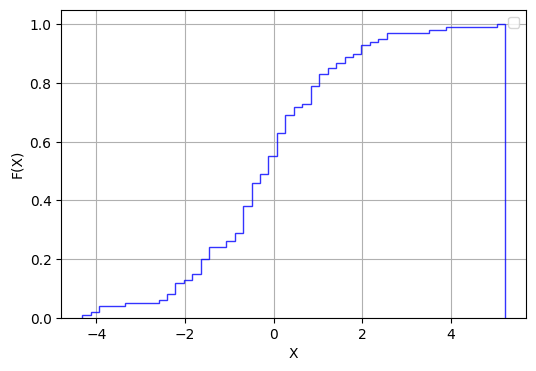

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# fix random seed
np.random.seed(2023)

# YOUR CODES HERE
N = 100

mu = 0
s = 1
y = np.random.rand(N, 1)

# Method 1 -- manually derive the inversion function
EXP1 = mu + s * np.log(y / (1 - y))
mean_EXP1 = np.mean(EXP1)


fig = plt.figure(figsize=(6, 4))
plt.hist(EXP1, bins=50, density=True, cumulative=True, alpha=0.8, color='blue', histtype='step', label=None)
plt.xlabel('X')
plt.ylabel('F(X)')
plt.grid(True)
# plt.xlim([0, 5])
# plt.ylim([0, 1])
plt.legend(loc='best')
plt.show()


Report the trend (means and empirical cdf) you have seen in Question 1. In addition to $N=100$, you can also try different numbers of $N$ to have a better understanding of the trend.


In [7]:
mean_EXP1

-0.10363800036700567

**Answer: HERE**

# Question 2. Rejection Sampling

Using acceptance-rejection method to generate realizations of random variable following **inverse Gaussian distribution**, denoted by $X$. The probability density function (pdf) of $X$ is:
$$
f_X(x|\mu,\lambda)=\begin{cases}
 \left(\frac{\lambda}{2\pi x^3}\right)^{1/2}e^{\frac{-\lambda(x-\mu)^2}{2\mu^2x}},~&\text{if }x> 0,\\
0,~&\text{otherwise}.
\end{cases}
$$
Set ${\lambda=\mu=1}$.



### (1) (0.5')
Find the maximum value of $f(x|\mu,\lambda)$, i.e., $\underset{x>0}{\max}~f(x|\mu,\lambda)$. Denote this value as $M$. You can either derive this value manually or by coding.

**Print $M$.**


In [ ]:
# YOUR CODES HERE (if needed)



### (2) (1')

Note that the support of $X$ is $(0,+\infty)$. We need to do some truncation. Find the value $\hat{x}$ such that the probability of $X$ being no greater than $\hat{x}$ is 0.99999, i.e.,
$$
F_X(\hat{x})=\mathbb{P}\{X\leq\hat{x}\}=0.99999,
$$
where
$$
F_X(x) = \Phi\left(\left(\frac{x}{\mu}-1\right)\sqrt{\frac{\lambda}{x}}\right)+\Phi\left(-\left(\frac{x}{\mu}+1\right)\sqrt{\frac{\lambda}{x}}\right)e^{2\lambda/\mu}.
$$

$\Phi(x)$ is the cumulative distribution function (cdf) of standard normal random variable (You can use `norm.cdf()` [1]). 

**To implement this in Python, you can use  and `fsolve(func, x0)` [2] to to find $\hat{x}$ (Please refer to the example in [2]).** 

**Print $\hat{x}$.**

Note that in `fsolve()`, you need to first make an initial guess (i.e., `x0`) of the solution. If your initial guess was not good enough, the `fsolve()` may break down. So you may have to guess it for a few times. And you can verify if the generated value of $\hat{x}$ indeed satisfies the above requirement.


[1] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html

In [ ]:
from scipy.stats import norm
from scipy.optimize import fsolve

# YOUR CODES HERE



### (3) (1')

Using the value of $M$ and $\hat{x}$ you get, generate $N=100000$ realizations of $X$ using acceptance-rejection method. You will generate many coordinates $(U[0,\hat{x}],~U[0,M])$.

**Plot the histogram of $X$ with `bins=200`.**


In [ ]:
# YOUR CODES HERE

